In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_file = ("../../examples/pytorch/output/reports/attack.csv")
data = pd.read_csv(csv_file)
# data = data[data['def_gen'] == 'HighConfidence']
if "Unnamed: 0" in data.columns:
    data.drop("Unnamed: 0", axis=1, inplace=True)


[Text(0, 0, 'GaussianAugmentation'),
 Text(1, 0, 'FeatureSqueezing'),
 Text(2, 0, 'GaussianNoise'),
 Text(3, 0, 'HighConfidence')]

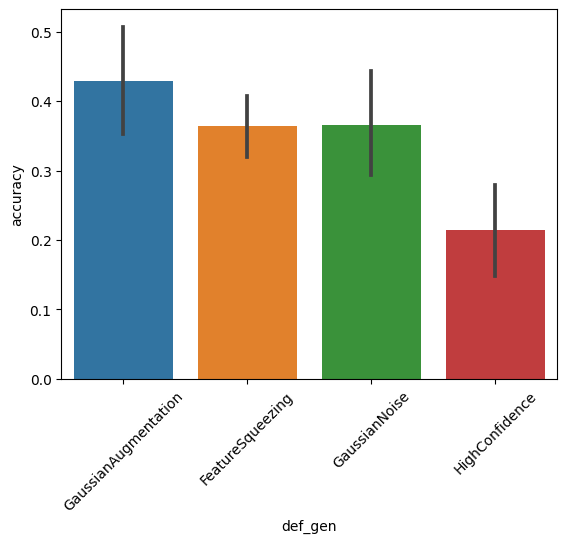

In [2]:
import seaborn as sns
numeric = data.select_dtypes(include=np.number)
graph1 = sns.barplot(data=data, x = "def_gen", y = "accuracy")
graph1.set_xticklabels(graph1.get_xticklabels(), rotation=45)



[Text(0, 0, 'GaussianAugmentation'),
 Text(1, 0, 'FeatureSqueezing'),
 Text(2, 0, 'GaussianNoise'),
 Text(3, 0, 'HighConfidence')]

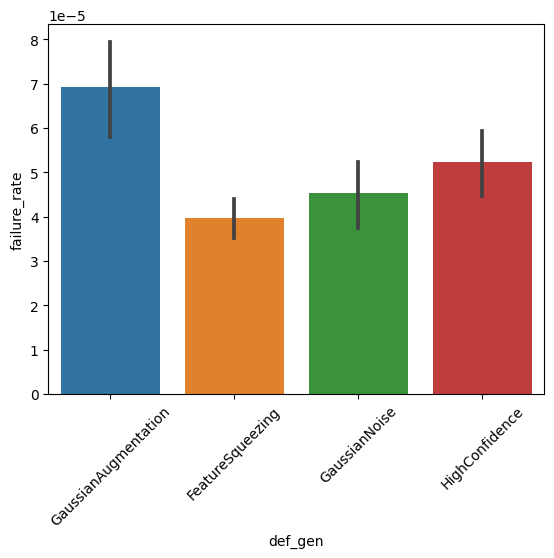

In [3]:
data['failure_rate'] = (1 - data['accuracy']) * data['train_time_per_sample']

graph2 = sns.barplot(data=data, x = "def_gen", y = "failure_rate")
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=45)




In [4]:

sub_df = data[data["def_gen"] == "FeatureSqueezing"]
sub_df['model.art.pipeline.preprocessor.kwargs.bit_depth'].unique()



control_dict = {
    # "FeatureSqueezing": "model.art.pipeline.preprocessor.kwargs.bit_depth",
    "GaussianAugmentation": "model.art.pipeline.preprocessor.kwargs.ratio",
    "HighConfidence": "model.art.pipeline.postprocessor.kwargs.cutoff",
    "GaussianNoise": "model.art.pipeline.postprocessor.kwargs.scale",
    "HSJ" : "attack.init.kwargs.max_eval",
    "FGM" : "attack.init.kwargs.eps",
    "PGD" : "attack.init.kwargs.eps",
    "DeepFool" : "attack.init.kwargs.max_iter",
    "CarliniL2" : "attack.init.kwargs.eps",
    "CarliniLInf" : "attack.init.kwargs.eps",
    np.nan : None
}

def merge_control(df, control_dict):
    for key, value in control_dict.items():
        for i, entry in df.iterrows():
            if "def_gen" in entry and entry["def_gen"] == key:
                df.loc[i, 'def_param'] = value.split(".")[-1]
                df.loc[i, 'def_value'] = entry[value]
            if "atk_gen" in entry and entry["atk_gen"] == key:
                df.loc[i, 'atk_param'] = value.split(".")[-1]
                df.loc[i, 'atk_value'] = entry[value]
        # if "def_value" in df.columns:
        #     max_ = df["def_value"].max()
        #     min_ = df["def_value"].min()
        #     df.loc[:, 'def_value'] = (df.loc[:, 'def_value'] - min_) / (max_ - min_)
        # if "atk_value" in df.columns:
        #     max_ = df["atk_value"].max()
        #     min_ = df["atk_value"].min()
        #     df.loc[:, 'atk_value'] = (df.loc[:, 'atk_value'] - min_) / (max_ - min_) 
    return df
        
    

df = merge_control(data, control_dict)
df.def_value.fillna(.0, inplace=True)
df.def_value

0      0.5
1      0.0
2      1.0
3      0.9
4      0.0
      ... 
651    0.1
652    1.0
653    0.0
654    0.9
655    1.0
Name: def_value, Length: 656, dtype: float64

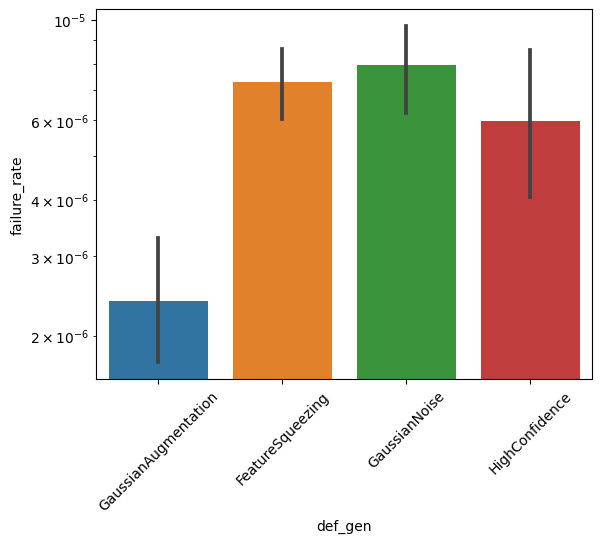

In [5]:
data['failure_rate'] = (1 - data['accuracy']) * data['predict_time_per_sample']

graph2 = sns.barplot(data=data, x = "def_gen", y = "failure_rate")
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=45)
graph2.set_yscale("log")


/home/cmeyers/deckard/env/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/home/cmeyers/deckard/env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


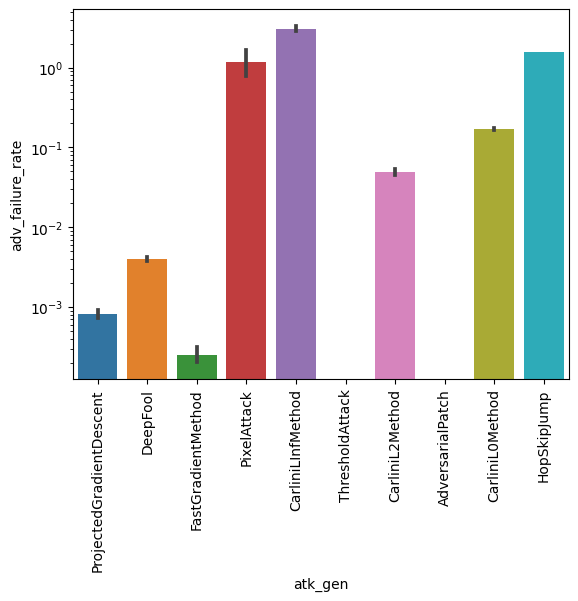

In [6]:
data['adv_failure_rate'] = (1 - data['adv_accuracy']) * data['adv_fit_time_per_sample']

graph2 = sns.barplot(data=data, x = "atk_gen", y = "adv_failure_rate")
graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90)
graph2.set_yscale("log")


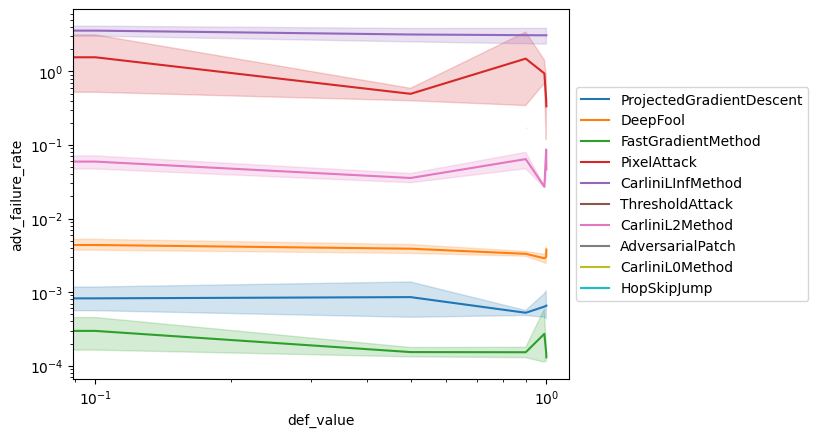

In [7]:
graph4 = sns.lineplot(data=data, x = "def_value", y = "adv_failure_rate", hue = "atk_gen")
graph4.set_yscale("log")
graph4.set_xscale("log")
graph4.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


{'_stale': True, 'stale_callback': None, 'figure': <Figure size 640x480 with 1 Axes>, '_transform': None, '_transformSet': False, '_visible': True, '_animated': False, '_alpha': None, 'clipbox': None, '_clippath': None, '_clipon': True, '_label': '', '_picker': None, '_rasterized': False, '_agg_filter': None, '_mouseover': False, '_callbacks': <matplotlib.cbook.CallbackRegistry object at 0x7fbac96cc250>, '_remove_method': None, '_url': None, '_gid': None, '_snap': None, '_sketch': None, '_path_effects': [], '_sticky_edges': _XYPair(x=[], y=[]), '_in_layout': True, '_suptitle': None, '_supxlabel': None, '_supylabel': None, '_align_label_groups': {'x': <matplotlib.cbook.Grouper object at 0x7fbac96cc6a0>, 'y': <matplotlib.cbook.Grouper object at 0x7fbac96cc760>}, '_localaxes': [<Axes: xlabel='def_value', ylabel='failure_rate'>], 'artists': [], 'lines': [], 'patches': [], 'texts': [], 'images': [], 'legends': [], 'subfigs': [], 'suppressComposite': None, '_layout_engine': None, '_fig_callb

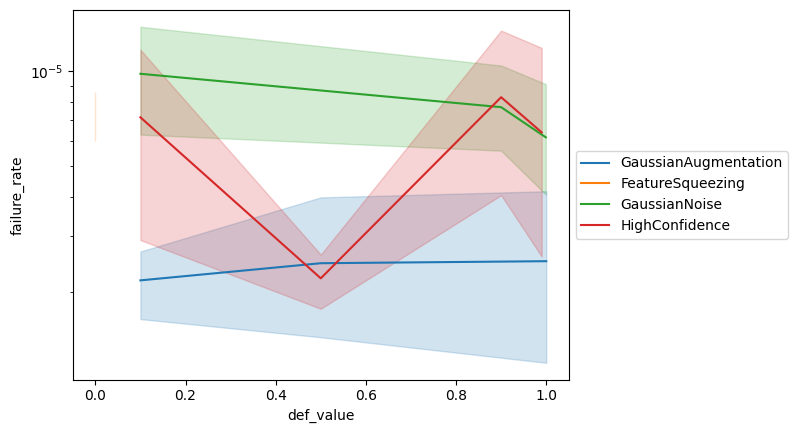

In [8]:
graph5 = sns.lineplot(data=data, x = "def_value", y = "failure_rate", hue = "def_gen")
graph5.set_yscale("log")
graph5.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
print(vars(graph5.get_figure()))

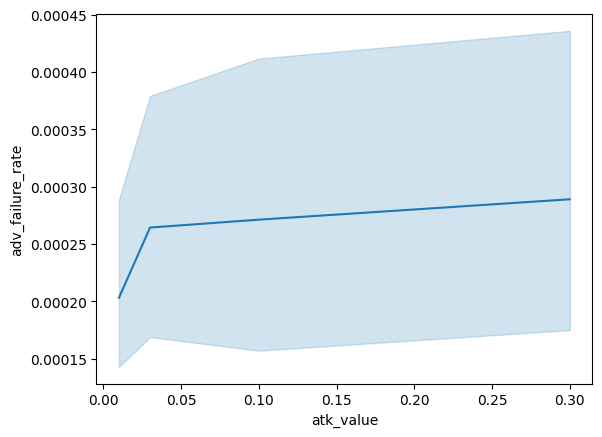

In [9]:
subset = data[data["atk_gen"] == "FastGradientMethod"]
subset.loc[:, 'atk_value'] = subset['attack.init.kwargs.eps']
graph7 = sns.lineplot(data=subset, x = "atk_value", y = "adv_failure_rate")


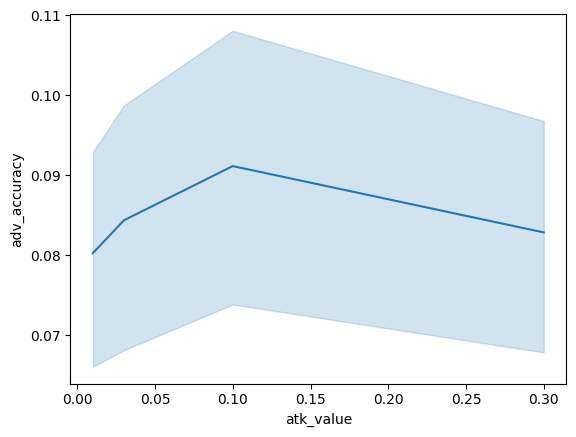

In [10]:
subset = data[data["atk_gen"] == "FastGradientMethod"]
subset.loc[:, 'atk_value'] = subset['attack.init.kwargs.eps']
graph7 = sns.lineplot(data=subset, x = "atk_value", y = "adv_accuracy")

In [11]:

from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter, CoxTimeVaryingFitter

# constants
subset = data[data["atk_gen"] == "FastGradientMethod"]
subset.loc[:, 'atk_value'] = subset['attack.init.kwargs.eps']
scorer = "accuracy"



cleaned = pd.DataFrame()
cleaned['accuracy'] = subset['accuracy']
cleaned['predict_time'] = subset['predict_time']
cleaned['train_time'] = subset['train_time']
cleaned['adv_fit_time'] = subset['adv_fit_time']
cleaned['adv_accuracy'] = subset['adv_accuracy']
# cleaned['adv_failure_rate'] = subset['advb_failure_rate']
cleaned['atk_value'] = subset['atk_value']
cleaned['def_value'] = subset['def_value']
cleaned['adv_fit_time'] = subset['adv_fit_time']
cleaned['adv_accuracy'] = subset['adv_accuracy']
cleaned['random_state'] = subset['data.sample.random_state']
status = []

# for adv_score, ben_score in zip(cleaned[f'{scorer}'], cleaned[f'adv_{scorer}']):
#     if adv_score < ben_score:
#         status.append(1)
#     else:
#         status.append(0)
# cleaned['status'] = status

# replace 0 with 1e-6 to avoid log(0) error
cleaned = cleaned[cleaned.columns.drop(list(cleaned.filter(regex='.1')))]
cleaned['predict_time'] = cleaned['predict_time'].replace(0, 1e-6)
cleaned.fillna(method="ffill", inplace=True)
cleaned.fillna(method="bfill", inplace=True)
cleaned = cleaned[cleaned.columns.drop(list(cleaned.filter(regex='.1')))]
cleaned['predict_time'] = cleaned['predict_time'].replace(0, 1e-6)

In [12]:
times = []
statuses = []
new_df = pd.DataFrame()
size = 100
new_cleaned = cleaned.copy()
i = 0
for _, row in new_cleaned.iterrows():
    times = np.random.uniform(0, row['adv_fit_time'], size)
    score = float(row.adv_accuracy)
    status = np.random.binomial(1, score, size)
    assert len(times) == len(status) == size
    del row['accuracy']
    del row['adv_accuracy']
    del row['adv_fit_time']
    results = row.to_dict()
    # results['random_state'] = row['random_state']
    del results['random_state']
    results['status'] = status
    sub_indices = range(i*size, size + (i*size))
    assert len(sub_indices) == len(status) == len(times) == size
    sub_df = pd.DataFrame(results, index=sub_indices)
    sub_df = sub_df.explode('status').reset_index(drop=True)
    sub_df['time'] = times
    i += 1
    sub_df['index'] = sub_indices
    
    new_df = pd.concat([new_df, sub_df], axis=0)
    new_df = new_df.reindex()
    
new_df = new_df.loc[:,~new_df.columns.duplicated()]
new_df.index = range(len(new_df))

assert np.sum(new_df.index.duplicated()) == np.sum(new_df.columns.duplicated()) == 0, f"{np.sum(new_df.index.duplicated())} {np.sum(new_df.columns.duplicated())}"

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

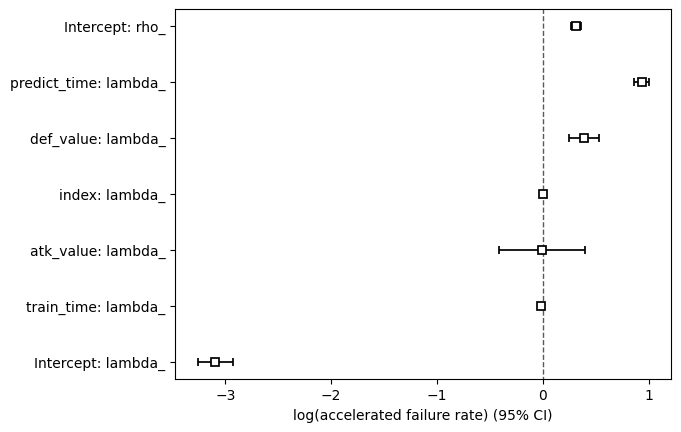

In [13]:
wft = WeibullAFTFitter()
wft.fit(new_df, duration_col='time', event_col='status')
wft.plot()
    

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

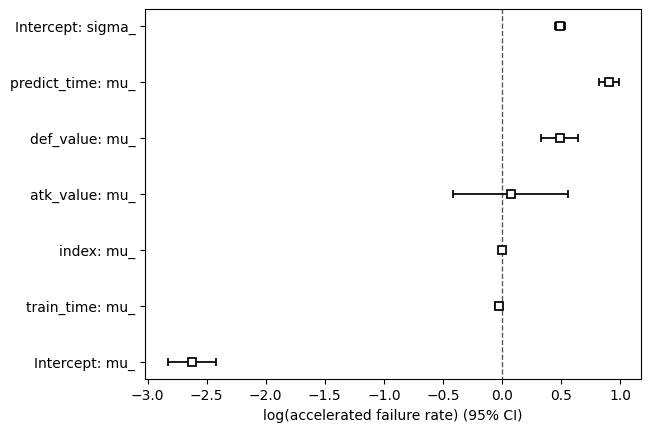

In [14]:
lnt = LogNormalAFTFitter()
lnt.fit(new_df, duration_col='time', event_col='status')
lnt.plot()

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

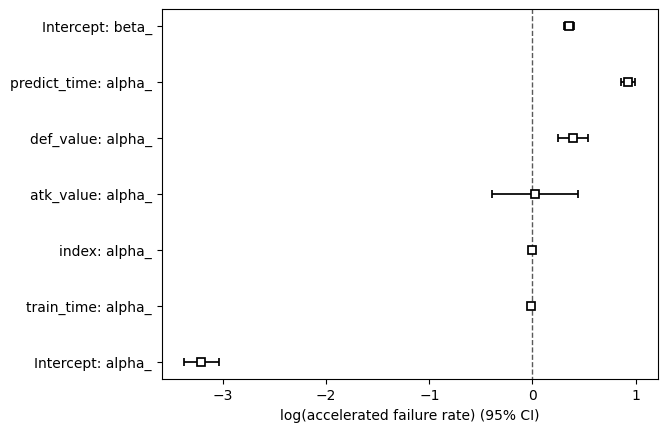

In [15]:
llt = LogLogisticAFTFitter()
llt.fit(new_df, duration_col='time', event_col='status')
llt.plot()

In [16]:
print(f"Weibull AIC: {wft.AIC_}")
print(f"LogNormal AIC: {lnt.AIC_}")
print(f"LogLogistic AIC: {llt.AIC_}")

Weibull AIC: -2511.47788199212
LogNormal AIC: -2356.0026071216694
LogLogistic AIC: -2497.8555475121693


In [17]:
print(f"Weibull Standard Errors: ")
print(wft.standard_errors_)
print(f"LogNormal Standard Errors: ")
print(lnt.standard_errors_)
print(f"LogLogistic Standard Errors: ")
print(llt.standard_errors_)

Weibull Standard Errors: 
param    covariate   
lambda_  atk_value       0.207349
         def_value       0.072179
         index           0.000006
         predict_time    0.034208
         train_time      0.012732
         Intercept       0.083904
rho_     Intercept       0.024551
Name: se, dtype: float64
LogNormal Standard Errors: 
param   covariate   
mu_     atk_value       0.249405
        def_value       0.079754
        index           0.000007
        predict_time    0.042077
        train_time      0.014803
        Intercept       0.104806
sigma_  Intercept       0.022783
Name: se, dtype: float64
LogLogistic Standard Errors: 
param   covariate   
alpha_  atk_value       0.212710
        def_value       0.072271
        index           0.000006
        predict_time    0.035469
        train_time      0.012915
        Intercept       0.085618
beta_   Intercept       0.024874
Name: se, dtype: float64


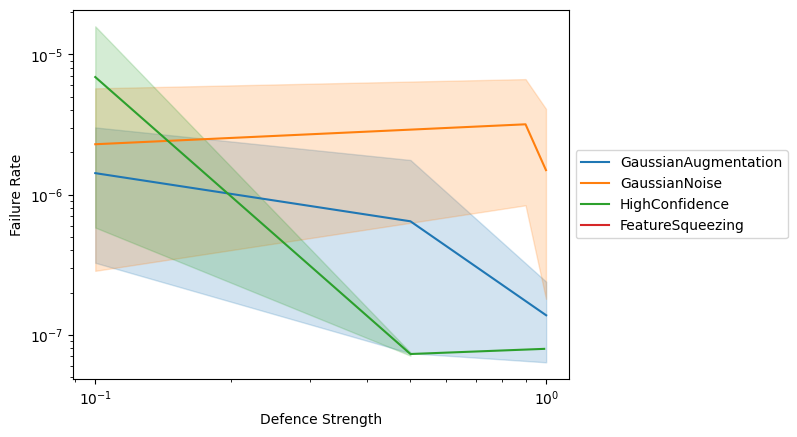

In [21]:
from paretoset import paretoset


score_dict = pd.DataFrame()
score_dict['accuracy'] = df.loc[:, "accuracy"]
# score_dict['failure_rate'] = df.loc[:, "failure_rate"]
score_dict['adv_accuracy'] = df.loc[:, "adv_accuracy"]
score_dict['atk_gen'] = df.loc[:, "atk_gen"]
score_dict['def_gen'] = df.loc[:, "def_gen"]
# score_dict['adv_failure_rate'] = df.loc[:, "adv_failure_rate"]
# score_dict['train_time_per_sample'] = df.loc[:, "train_time_per_sample"]
# score_dict['adv_fit_time_per_sample'] = df.loc[:, "adv_fit_time_per_sample"]


pareto = paretoset(score_dict,  sense=["max", "max", "diff", "diff"])
subset = df[pareto]
graph6 = sns.lineplot(data=subset, x = "def_value", y = "failure_rate", hue = "def_gen")
graph6.set_yscale("log")
graph6.set_xscale("log")
graph6.set_xlabel("Defence Strength")
graph6.set_ylabel("Failure Rate")
graph6.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


In [ ]:
subset = df[pareto]
graph6 = sns.lineplot(data=subset, x = "def_value", y = "failure_rate", hue = "atk_gen")
graph6.set_yscale("log")
graph6.set_xscale("log")
graph6.set_xlabel("Attack Strength")
graph6.set_ylabel("Failure Rate")
graph6.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# np.random.seed(1)

# a, m = 30., 2.  # shape and mode
# s = (np.random.pareto(a, 1000) + 1) * m


# count, bins, _ = plt.hist(s, 100, density=True, label='1000 Pareto samples, a=30')
# fit = a*m**a / bins**(a+1)
# plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r', label='max(count)*fit/max(fit)')
# plt.plot(bins, fit, linewidth=2, color='g', label='fit')

# plt.legend()
# plt.show()

In [ ]:
subset = df[pareto].sort_values(by="adv_failure_rate", ascending=True)
failure_hist = sns.distplot(subset['adv_failure_rate'], hist=False, rug=True, label="Accuracy")
failure_hist.set_xlabel("Adversarial Failure Rate")
failure_hist.set_xscale("log")

In [ ]:
subset = df[pareto].sort_values(by="train_time", ascending=True)
failure_hist = sns.distplot(subset['train_time'], hist=False, rug=True, label="Accuracy")
failure_hist.set_xlabel("Training Time")
failure_hist.set_xscale("log")

In [ ]:
pareto_graph = sns.lineplot(data=subset, x = "train_time", y = "adv_failure_rate", hue = "atk_gen")
pareto_graph.set_yscale("log")
pareto_graph.set_xscale("log")
pareto_graph.set_xlabel("Training Time")
pareto_graph.set_ylabel("Adversarial Failure Rate")
pareto_graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [ ]:
pareto_graph = sns.scatterplot(data=subset, x = "train_time", y = "adv_failure_rate", hue ='def_gen')
pareto_graph.set_yscale("log")
pareto_graph.set_xscale("log")
pareto_graph.set_xlabel("Training Time")
pareto_graph.set_ylabel("Adversarial Failure Rate")
pareto_graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [ ]:
pareto_graph = sns.scatterplot(data=subset, x = "train_time", y = "adv_failure_rate", hue = 'atk_gen')
pareto_graph.set_yscale("log")
pareto_graph.set_xscale("log")
pareto_graph.set_xlabel("Training Time")
pareto_graph.set_ylabel("Adversarial Failure Rate")
pareto_graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [ ]:
pareto_graph = sns.scatterplot(data=subset, x = "def_value", y = "adv_failure_rate", hue = 'atk_gen')
pareto_graph.set_yscale("log")
pareto_graph.set_xscale("log")
pareto_graph.set_xlabel("Defense Strength")
pareto_graph.set_ylabel("Adversarial Failure Rate")
pareto_graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

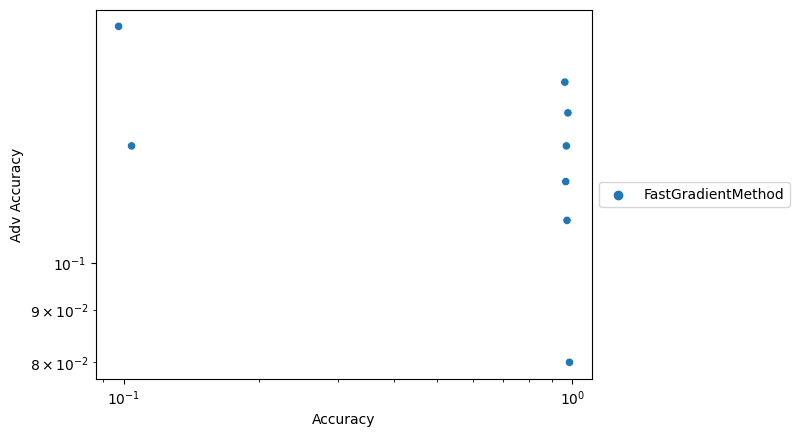

In [22]:
subset = subset[subset['atk_gen'] == "FastGradientMethod"]
pareto_graph = sns.scatterplot(data=subset, x = "accuracy", y = "adv_accuracy", hue = 'atk_gen')
pareto_graph.set_yscale("log")
pareto_graph.set_xscale("log")
pareto_graph.set_xlabel("Accuracy")
pareto_graph.set_ylabel("Adv Accuracy")
pareto_graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)